In [2]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [14]:
def plot_movement_trajectory(file_path):
    
    #get the trial no for the title
    file_name = os.path.basename(file_path)
    trial_no = file_name.split('_')[-1].split('.')[0]


    # Load the data from the CSV file
    movement_data = pd.read_csv(file_path)

    # Extract position coordinates and time
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Create a 2D plot with a trail effect viewed from above (X vs Z) using time for color gradient
    plt.figure(figsize=(10, 8))
    plt.scatter(pos_x, pos_z, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Movement Trajectory with Trail Effect for {trial_no}')
    plt.colorbar(label='Time')
    plt.grid(True)
    plt.show()



In [20]:
def plot_movement_trajectory_with_speed(file_path):


    # get the trial no for the title
    file_name = os.path.basename(file_path)
    trial_no = file_name.split('_')[-1].split('.')[0]

    # Load the data from the CSV file
    movement_data = pd.read_csv(file_path)

    # Extract position coordinates and time
    pos_x = movement_data['pos_x']
    pos_y = movement_data['pos_y']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Calculate distances between consecutive points
    distances = np.sqrt(np.diff(pos_x)**2 + np.diff(pos_y)**2 + np.diff(pos_z)**2)

    # Calculate time differences between consecutive points
    time_diff = np.diff(time)

    # Calculate speed (distance / time)
    speed = distances / time_diff

    # Plot the top-down view of the movement trajectory with trail effect
    plt.figure(figsize=(10, 8))
    plt.scatter(pos_x, pos_z, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Movement Trajectory for {trial_no}')
    plt.colorbar(label='Time')
    plt.grid(True)
    plt.show()

    # Plot the speed over time
    plt.figure(figsize=(10, 6))
    plt.plot(time[:-1], speed, label='Speed')
    plt.xlabel('Time')
    plt.ylabel('Speed')
    plt.title(f'Movement Speed over Time for {trial_no}')
    plt.legend()
    plt.grid(True)
    plt.show()



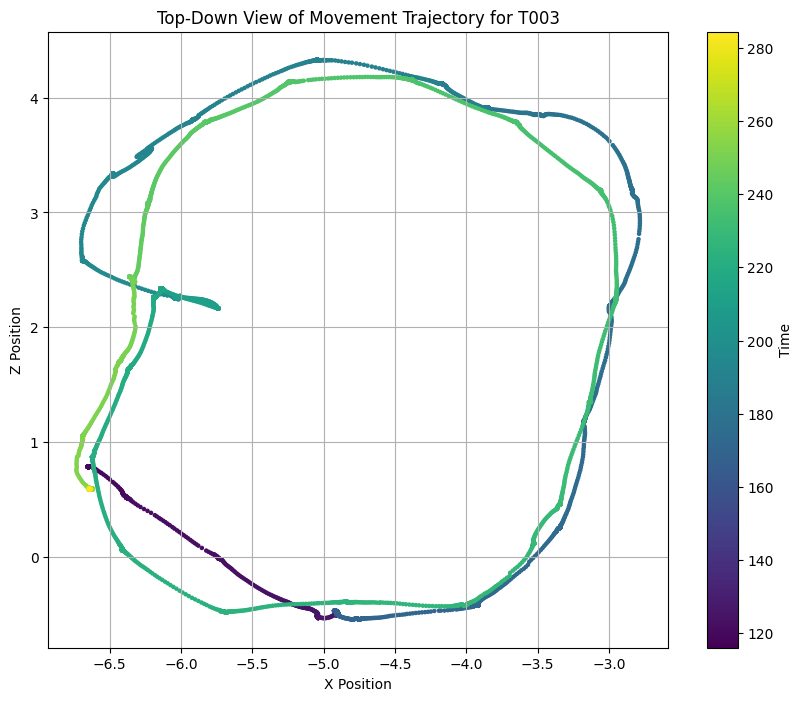

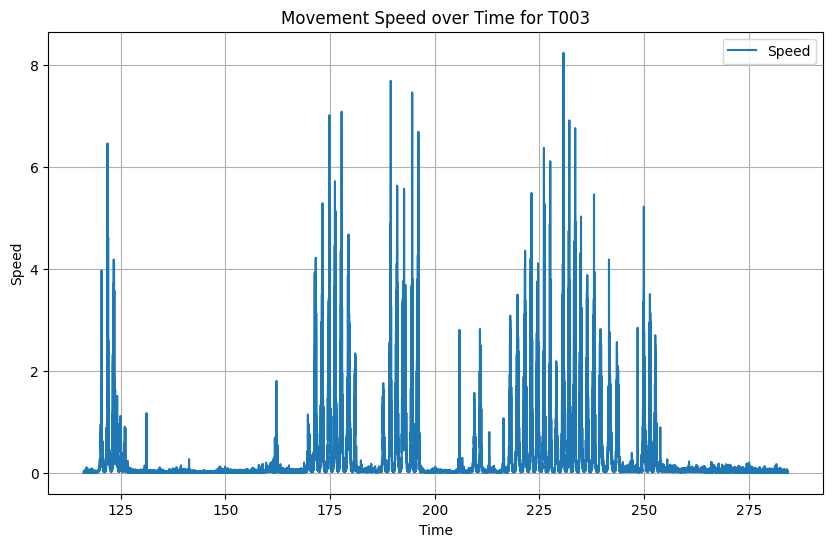

In [21]:
plot_movement_trajectory_with_speed(r'C:\Users\lal\Documents\tez\analysis\vr\vrtracking\trackerR_movement_T003.csv')

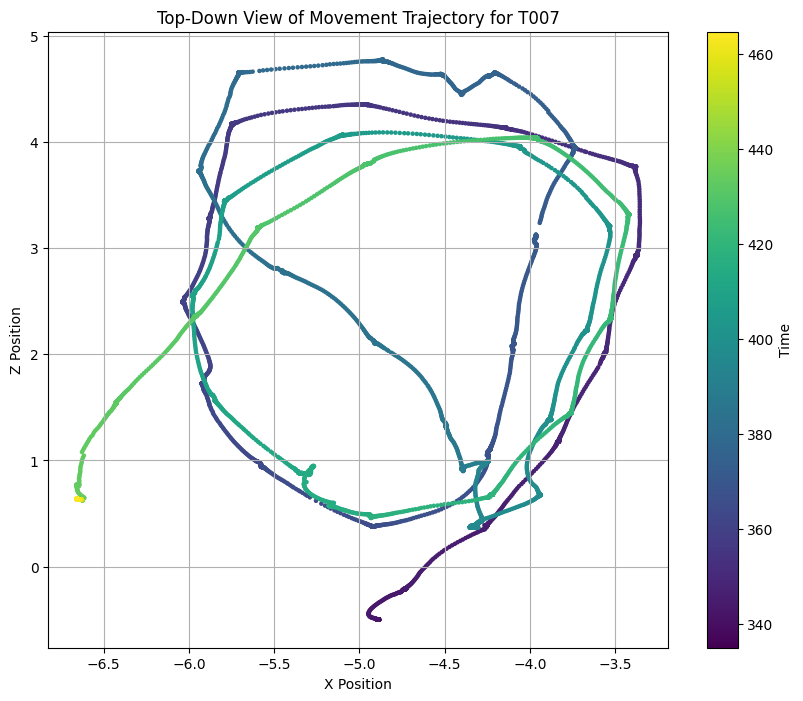

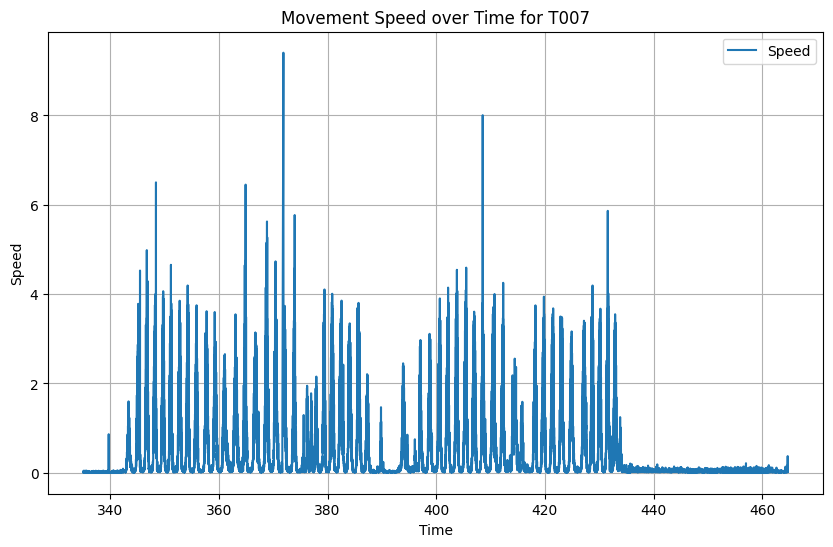

In [22]:
plot_movement_trajectory_with_speed(r'C:\Users\lal\Documents\tez\analysis\vr\vrtracking\trackerR_movement_T007.csv')

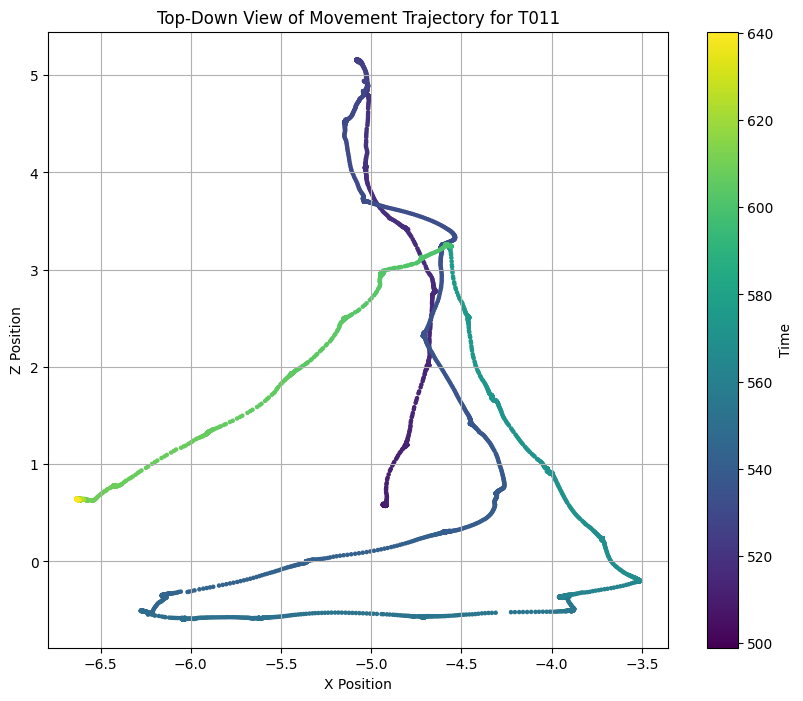

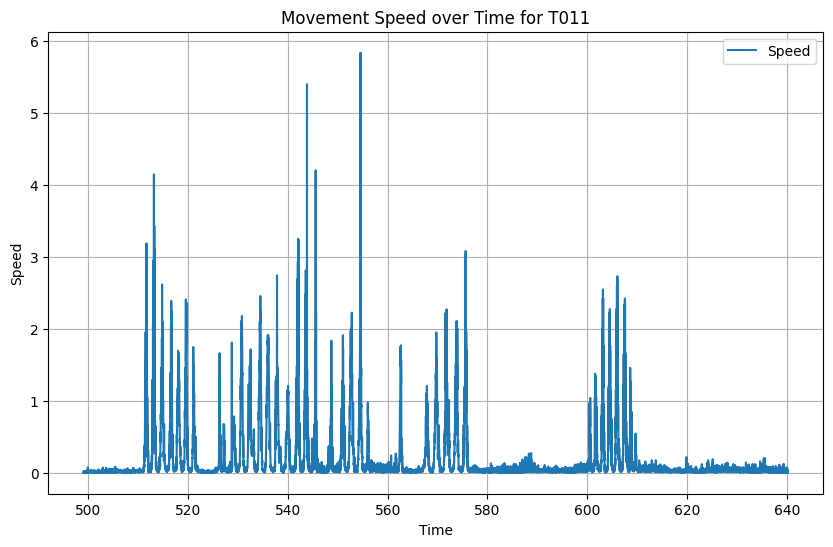

In [23]:
plot_movement_trajectory_with_speed(r'C:\Users\lal\Documents\tez\analysis\vr\vrtracking\trackerR_movement_T011.csv')

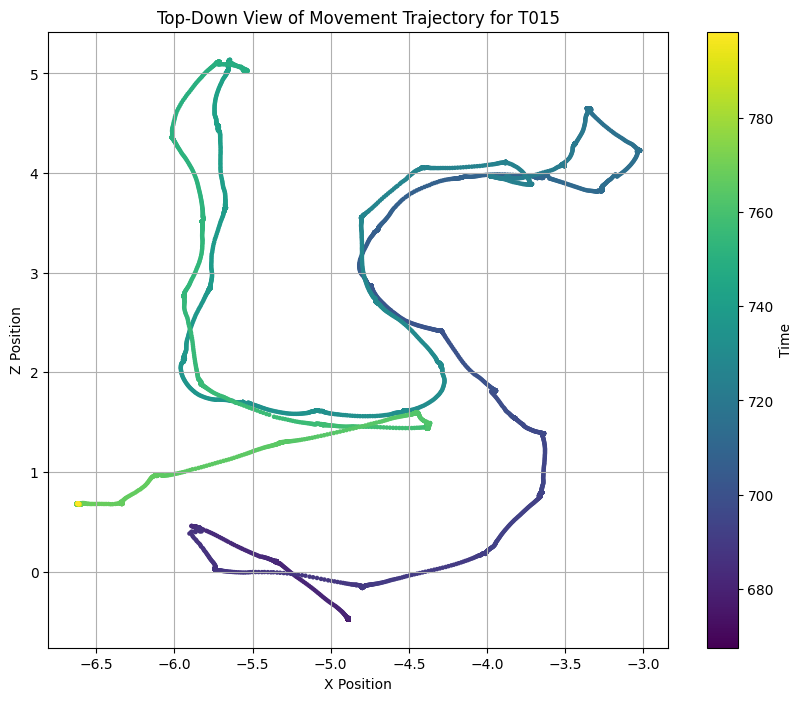

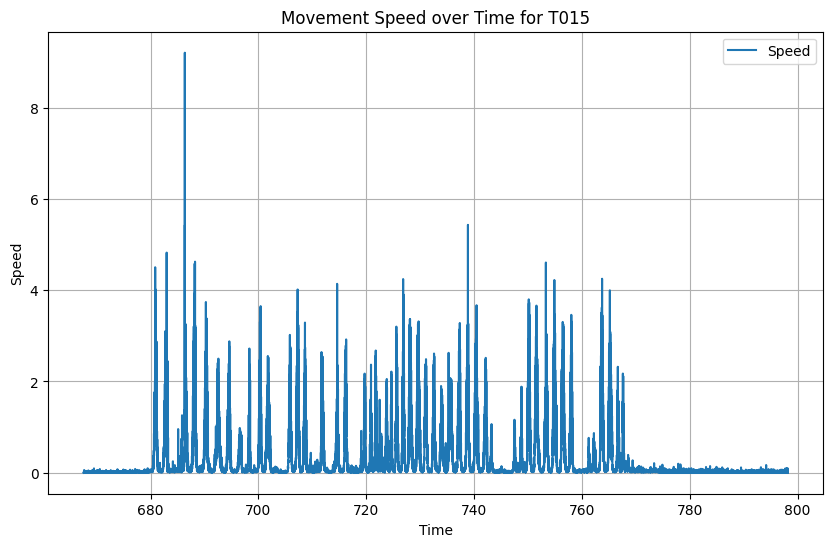

In [24]:
plot_movement_trajectory_with_speed(r'C:\Users\lal\Documents\tez\analysis\vr\vrtracking\trackerR_movement_T015.csv')

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_movement_trajectory_with_layout(file_path):
    def draw_elevated_platform(ax):
        # Coordinates from the image
        platform_coords = [
            (-4.83, 1.89), (-5.42, 1.71), (-5.77, 2.82), (-6.32, 2.68),
            (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
            (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),  
        ]
        # Drawing the elevated platform layout
        platform_coords.append(platform_coords[0])  # Close the loop
        xs, ys = zip(*platform_coords)
        ax.plot(xs, ys, 'r-', linewidth=2)
        ax.plot(-6.11, 4.90, 'ro')  # Additional points
        ax.plot(-5.98, 5.16, 'ro')
        ax.plot(-6.32, 5.08, 'ro')
        ax.plot(-6.20, 5.24, 'ro')
        ax.plot(-5.75, 4.06, 'ro')	# Center point marked with 'x'   
    # Extract the scene identifier from the file path
    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]
    print(scene_id)
    # Load the data from the CSV file
    movement_data = pd.read_csv(file_path)

    # Extract position coordinates and time
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Create a 2D plot with a trail effect viewed from above (X vs Z) using time for color gradient
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(pos_x, pos_z, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(True)

    # Draw the specific layout based on the scene identifier
    if scene_id == 'T011':
        draw_elevated_platform(ax)
    elif scene_id == 'T003':
        draw_training_room(ax)
    elif scene_id == 'T007':
        draw_empty_room(ax)

    plt.show()

def draw_training_room(ax):
    # Add code for drawing training room layout
    pass

def draw_empty_room(ax):
    # Add code for drawing empty room layout
    pass


T011


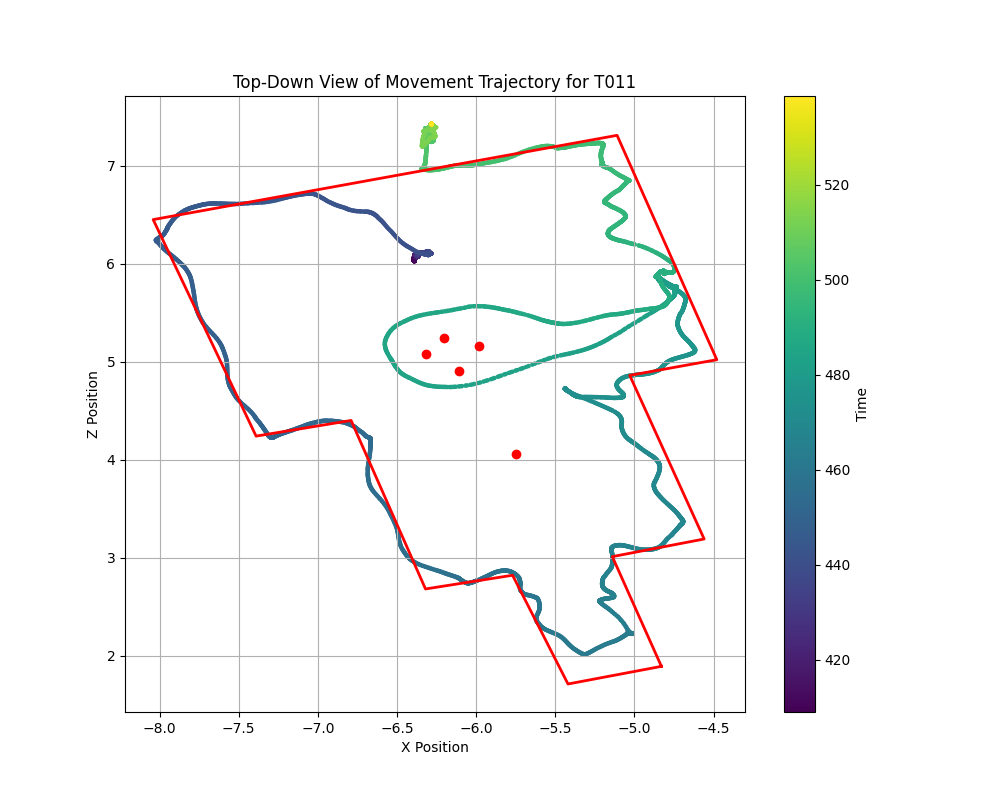

In [11]:

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\vr\pilotdatavr2\camera_movement_T011.csv')


In [20]:

def pixel_to_cartesian(pixel_coords, image_coords, real_coords):
    # Extract x and y coordinates from image_coords and real_coords
    image_x = image_coords[:, 0]
    image_y = image_coords[:, 1]
    real_x = real_coords[:, 0]
    real_y = real_coords[:, 1]

    # Calculate the coefficients for the linear transformation
    coefficients = np.polyfit(image_x, real_x, 1)
    a_x = coefficients[0]
    b_x = coefficients[1]

    coefficients = np.polyfit(image_y, real_y, 1)
    a_y = coefficients[0]
    b_y = coefficients[1]

    # Convert pixel coordinates to cartesian coordinates
    px, py = pixel_coords
    cx = a_x * px + b_x
    cy = a_y * py + b_y

    cx = round(cx, 2)
    cy = round(cy, 2)

    return cx, cy

In [21]:
real_coords = np.array([
    [-8.90, 8.21],
    [-5.39, 9.03],
    [-7.03, 0.97],
    [-3.56, 1.81]
])

image_coords = np.array([
    [298, 192],
    [554, 127],
    [434, 720],
    [689, 653]
])

In [23]:
pixel_coords=(528.30, 131.99)
# Convert pixel coordinates to cartesian coordinates
cartesian_coords = pixel_to_cartesian(pixel_coords, image_coords, real_coords)

print("Cartesian Coordinates:", cartesian_coords)

Cartesian Coordinates: (-5.75, 8.99)


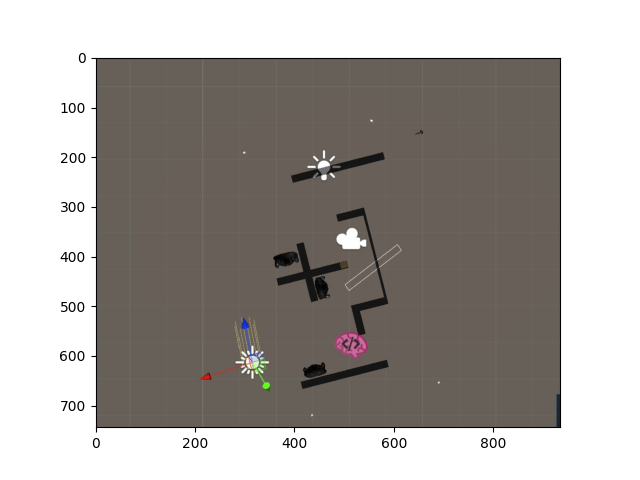

Clicked coordinates: Pixel - (528.3, 131.99), Cartesian - (-6.11, 8.53)
Clicked coordinates: Pixel - (528.3, 131.99), Cartesian - (-8.91, 8.42)
Clicked coordinates: Pixel - (528.3, 131.99), Cartesian - (-9.49, 6.74)


In [24]:
def on_mouse_click(event):
    if event.button == 1:  # Left mouse 
        x, y = event.xdata, event.ydata
        cartesian_coords = pixel_to_cartesian((x,y), image_coords, real_coords)
        ax.scatter(x, y, color='red')
        ax.text(x, y, f'{cartesian_coords}', fontsize=12, color='red')
        print(f"Clicked coordinates: Pixel - {pixel_coords}, Cartesian - {cartesian_coords}")

# Load the image
image = plt.imread(r"C:\Users\lal\Pictures\Unbenannt.png")

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Connect the mouse click event to the callback function
fig.canvas.mpl_connect('button_press_event', on_mouse_click)

# Show the plot
plt.show()